# init

In [1]:
import numpy as np
import pyaudio as pa
from math import sin, pi

In [5]:
fmt = pa.paInt16
samp = 8000

In [6]:
left = 440
right = 445

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# timeit

In [8]:
%timeit -n 10 np.arange(10000000) * 2 * pi * left / samp

10 loops, best of 3: 246 ms per loop


In [9]:
%timeit -n 10 2 * pi * left / samp * np.arange(10000000)

10 loops, best of 3: 91.6 ms per loop


# timeit

In [10]:
%timeit np.sin(2 * pi * left / samp * np.arange(samp))

The slowest run took 5.31 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 136 µs per loop


In [11]:
theta = 2 * pi * left / samp
%timeit np.sin(theta * np.arange(samp))

10000 loops, best of 3: 136 µs per loop


# timeit

In [12]:
def func1():
    data = np.zeros(samp * 2)
    ldata = np.sin(2 * pi * left / samp * np.arange(samp))
    rdata = np.sin(2 * pi * right / samp * np.arange(samp))
    index = np.arange(0,samp*2,2)
    np.add.at(data, index, ldata)
    np.add.at(data, index + 1, rdata)

In [13]:
def func2():
    length = int(samp)
    num = length << 1
    data = [0.0] * num
    left_theta = 2 * pi * float(left) / samp
    right_theta = 2 * pi * float(right) / samp
    for (n, l), r in zip(enumerate(range(0, num, 2)), range(1, num, 2)):
        data[l] = sin(left_theta * n)
        data[r] = sin(right_theta * n)

In [14]:
%timeit func1()

1000 loops, best of 3: 1.95 ms per loop


In [15]:
%timeit func2()

100 loops, best of 3: 5.56 ms per loop


# main

In [16]:
data = np.zeros(samp * 2)
ldata = np.sin(2 * pi * left / samp * np.arange(samp))
rdata = np.sin(2 * pi * right / samp * np.arange(samp))
index = np.arange(0,samp*2,2)
np.add.at(data, index, ldata)
np.add.at(data, index + 1, rdata)
print(data, ldata, rdata, index, sep='\n')

[ 0.          0.          0.33873792 ..., -0.64345586 -0.33873792
 -0.34243013]
[ 0.          0.33873792  0.63742399 ..., -0.86074203 -0.63742399
 -0.33873792]
[ 0.          0.34243013  0.64345586 ..., -0.86667916 -0.64345586
 -0.34243013]
[    0     2     4 ..., 15994 15996 15998]


# plot

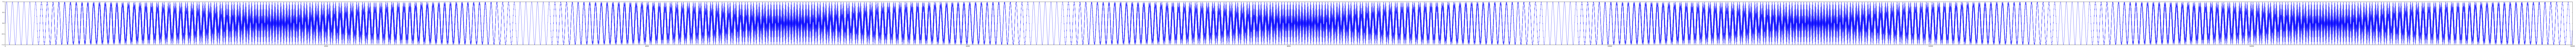

In [17]:
plt.figure(figsize=(300,5))
plt.plot(data)

# main

In [ ]:
data = 

# test

In [70]:
d = np.arange(100)
d

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [71]:
i = np.arange(0,100,2)
i

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [72]:
np.add.at(d, i, 1)
d

array([ 1,  1,  3,  3,  5,  5,  7,  7,  9,  9, 11, 11, 13, 13, 15, 15, 17,
       17, 19, 19, 21, 21, 23, 23, 25, 25, 27, 27, 29, 29, 31, 31, 33, 33,
       35, 35, 37, 37, 39, 39, 41, 41, 43, 43, 45, 45, 47, 47, 49, 49, 51,
       51, 53, 53, 55, 55, 57, 57, 59, 59, 61, 61, 63, 63, 65, 65, 67, 67,
       69, 69, 71, 71, 73, 73, 75, 75, 77, 77, 79, 79, 81, 81, 83, 83, 85,
       85, 87, 87, 89, 89, 91, 91, 93, 93, 95, 95, 97, 97, 99, 99])

In [18]:
d = np.zeros(100)
a = np.arange(50)
i = np.arange(0, 100, 2)
np.add.at(d, i, a)
d * 2

array([  0.,   0.,   2.,   0.,   4.,   0.,   6.,   0.,   8.,   0.,  10.,
         0.,  12.,   0.,  14.,   0.,  16.,   0.,  18.,   0.,  20.,   0.,
        22.,   0.,  24.,   0.,  26.,   0.,  28.,   0.,  30.,   0.,  32.,
         0.,  34.,   0.,  36.,   0.,  38.,   0.,  40.,   0.,  42.,   0.,
        44.,   0.,  46.,   0.,  48.,   0.,  50.,   0.,  52.,   0.,  54.,
         0.,  56.,   0.,  58.,   0.,  60.,   0.,  62.,   0.,  64.,   0.,
        66.,   0.,  68.,   0.,  70.,   0.,  72.,   0.,  74.,   0.,  76.,
         0.,  78.,   0.,  80.,   0.,  82.,   0.,  84.,   0.,  86.,   0.,
        88.,   0.,  90.,   0.,  92.,   0.,  94.,   0.,  96.,   0.,  98.,
         0.])

In [82]:
type(np.array([1]))

numpy.ndarray

In [98]:
n = 10000000
%timeit -n 10 np.arange(n) * 1.1 * 2.2 / 3.3

10 loops, best of 3: 212 ms per loop


In [99]:
%timeit -n 10 1.1 * 2.2 / 3.3 * np.arange(n)

10 loops, best of 3: 90.9 ms per loop


In [67]:
paFormat=[pa.paFloat32, pa.paInt32, pa.paInt24, pa.paInt16, pa.paInt8]
print(paFormat)
print(pa.get_format_from_width(1))
print(pa.get_portaudio_version())
print(pa.get_portaudio_version_text())
for i, f in enumerate(paFormat):
    s = pa.get_sample_size(f)
    print(str(i)+':', f, s, (2**8)**s/2 - 1)

[1, 2, 4, 8, 16]
32
1246720
PortAudio V19.6.0-devel, revision 396fe4b6699ae929d3a685b3ef8a7e97396139a4
0: 1 4 2147483647.0
1: 2 4 2147483647.0
2: 4 3 8388607.0
3: 8 2 32767.0
4: 16 1 127.0


256

In [91]:
rate = 100
length = rate * 2
data = np.arange(length)
index = np.arange(0, length, 2)
np.add.at(data, index + 1, -1)
data

array([  0,   0,   2,   2,   4,   4,   6,   6,   8,   8,  10,  10,  12,
        12,  14,  14,  16,  16,  18,  18,  20,  20,  22,  22,  24,  24,
        26,  26,  28,  28,  30,  30,  32,  32,  34,  34,  36,  36,  38,
        38,  40,  40,  42,  42,  44,  44,  46,  46,  48,  48,  50,  50,
        52,  52,  54,  54,  56,  56,  58,  58,  60,  60,  62,  62,  64,
        64,  66,  66,  68,  68,  70,  70,  72,  72,  74,  74,  76,  76,
        78,  78,  80,  80,  82,  82,  84,  84,  86,  86,  88,  88,  90,
        90,  92,  92,  94,  94,  96,  96,  98,  98, 100, 100, 102, 102,
       104, 104, 106, 106, 108, 108, 110, 110, 112, 112, 114, 114, 116,
       116, 118, 118, 120, 120, 122, 122, 124, 124, 126, 126, 128, 128,
       130, 130, 132, 132, 134, 134, 136, 136, 138, 138, 140, 140, 142,
       142, 144, 144, 146, 146, 148, 148, 150, 150, 152, 152, 154, 154,
       156, 156, 158, 158, 160, 160, 162, 162, 164, 164, 166, 166, 168,
       168, 170, 170, 172, 172, 174, 174, 176, 176, 178, 178, 18

In [97]:
tmp = np.zeros(rate * 2 * 2)
tmpind = np.arange(rate * 2)
np.add.at(tmp, tmpind + 1, data)
tmp.astype(np.int)

array([   0.,    0.,    0.,    2.,    2.,    4.,    4.,    6.,    6.,
          8.,    8.,   10.,   10.,   12.,   12.,   14.,   14.,   16.,
         16.,   18.,   18.,   20.,   20.,   22.,   22.,   24.,   24.,
         26.,   26.,   28.,   28.,   30.,   30.,   32.,   32.,   34.,
         34.,   36.,   36.,   38.,   38.,   40.,   40.,   42.,   42.,
         44.,   44.,   46.,   46.,   48.,   48.,   50.,   50.,   52.,
         52.,   54.,   54.,   56.,   56.,   58.,   58.,   60.,   60.,
         62.,   62.,   64.,   64.,   66.,   66.,   68.,   68.,   70.,
         70.,   72.,   72.,   74.,   74.,   76.,   76.,   78.,   78.,
         80.,   80.,   82.,   82.,   84.,   84.,   86.,   86.,   88.,
         88.,   90.,   90.,   92.,   92.,   94.,   94.,   96.,   96.,
         98.,   98.,  100.,  100.,  102.,  102.,  104.,  104.,  106.,
        106.,  108.,  108.,  110.,  110.,  112.,  112.,  114.,  114.,
        116.,  116.,  118.,  118.,  120.,  120.,  122.,  122.,  124.,
        124.,  126.,

In [104]:
np.dtype('S1')

dtype('S1')

In [105]:
help(Exception)

Help on class BaseException in module builtins:

class BaseException(object)
 |  Common base class for all exceptions
 |  
 |  Methods defined here:
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __reduce__(...)
 |      helper for pickle
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __setattr__(self, name, value, /)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(...)
 |  
 |  __str__(self, /)
 |      Return str(self).
 |  
 |  with_traceback(...)
 |      Exception.with_traceback(tb) --
 |      set self.__traceback__ to tb and return self.
 |  
 |  ----------------------------------------------